In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits-and-vegetables-prices-in-usa/Prices.csv


In [2]:
file = pd.read_csv("/kaggle/input/fruits-and-vegetables-prices-in-usa/Prices.csv")

In [3]:
df = pd.DataFrame(file)

In [4]:
df.head()

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.1804,per pound,0.4586,0.4519,pounds,1.1633
1,Apples,Fresh,1.5193,per pound,0.9000,0.2425,pounds,0.4094
2,"Apples, applesauce",Canned,1.0660,per pound,1.0000,0.5401,pounds,0.5758
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.0000,8.0000,fluid ounces,0.2926
4,"Apples, ready-to-drink",Juice,0.7804,per pint,1.0000,8.0000,fluid ounces,0.3902


In [5]:
df['RetailPrice'].mean()

2.1795529032258063

In [6]:
df["RetailPriceUnit"].unique()

array(['per pound', 'per pint'], dtype=object)

In [7]:
df["Yield"]

0      0.4586
1      0.9000
2      1.0000
3      1.0000
4      1.0000
        ...  
150    0.7500
151    0.6500
152    0.7760
153    0.5200
154    0.7695
Name: Yield, Length: 155, dtype: float64

In [8]:
df.describe()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,155.000000,155.000000,155.000000,155.000000
mean,2.179553,0.926450,0.885175,0.814088
std,1.559205,0.400215,1.974584,0.485388
min,0.360400,0.375000,0.123200,0.202100
25%,1.156550,0.665000,0.319700,0.519850
50%,1.721800,0.910000,0.352700,0.676900
75%,2.578300,1.000000,0.385800,1.022300
max,10.552700,2.539700,8.000000,3.070000


In [9]:
# Filter and inspect outliers
outliers = df[df['Yield'] > 1]
print(outliers)
percentage_of_outliers=(outliers.shape[0]/df.shape[0])* 100
print(percentage_of_outliers)
# Assuming 'df' is your original DataFrame and 'outliers' is a DataFrame of outlier rows
df = df.drop(outliers.index)

                     Item    Form  RetailPrice RetailPriceUnit   Yield  \
13              Asparagus  Frozen       6.7045       per pound  1.0335   
19            Black beans   Dried       1.3753       per pound  2.4692   
23          Blackeye peas   Dried       1.7584       per pound  2.5397   
29       Brussels sprouts   Fresh       2.6895       per pound  1.0600   
49         Collard greens   Fresh       2.6820       per pound  1.1600   
69   Great northern beans   Dried       1.6965       per pound  2.4692   
77                   Kale   Fresh       2.5018       per pound  1.0500   
80           Kidney beans   Dried       1.7218       per pound  2.4692   
82                Lentils   Dried       1.6493       per pound  2.4692   
87             Lima beans  Frozen       1.8995       per pound  1.0970   
88             Lima beans   Dried       2.1861       per pound  2.5397   
100            Navy beans   Dried       1.4942       per pound  2.4692   
125           Pinto beans   Dried     

In [10]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [11]:
retail_price_unit_counts=df["RetailPriceUnit"].value_counts()

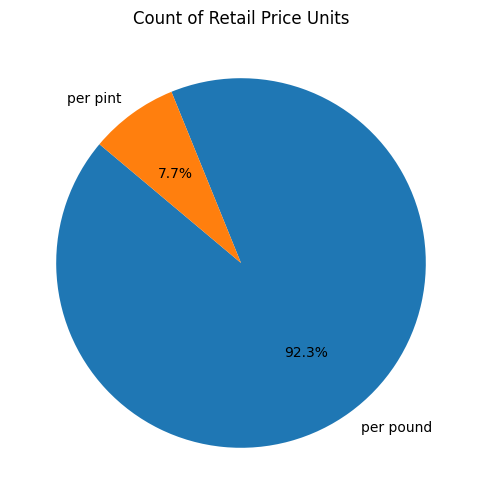

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot
plt.pie(retail_price_unit_counts, labels=retail_price_unit_counts.index, autopct='%1.1f%%', startangle=140)

# Adding titles and labels
plt.title('Count of Retail Price Units')


# Show the plot
plt.show()


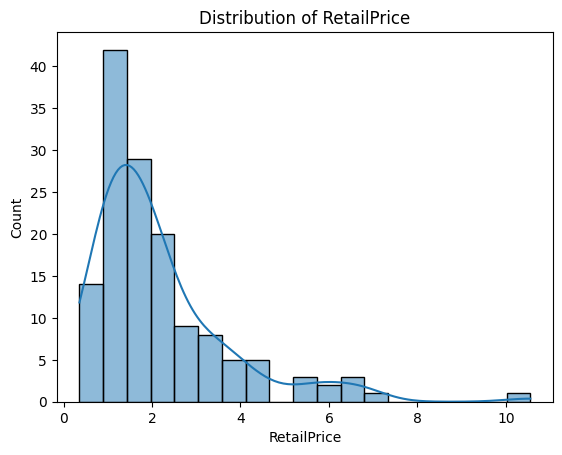

In [13]:
# Histogram for Yield
plt.subplot(1, 1, 1)
sns.histplot(df['RetailPrice'], kde=True)
plt.title('Distribution of RetailPrice')
plt.show()

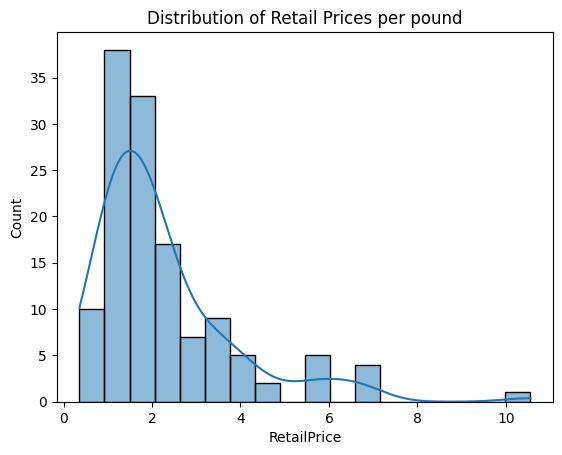

In [14]:
# Histogram for RetailPrice per pound
df_per_pound=df[df["RetailPriceUnit"]=="per pound"]
plt.subplot(1, 1, 1)
sns.histplot(df_per_pound['RetailPrice'], kde=True)
plt.title('Distribution of Retail Prices per pound')

plt.show()


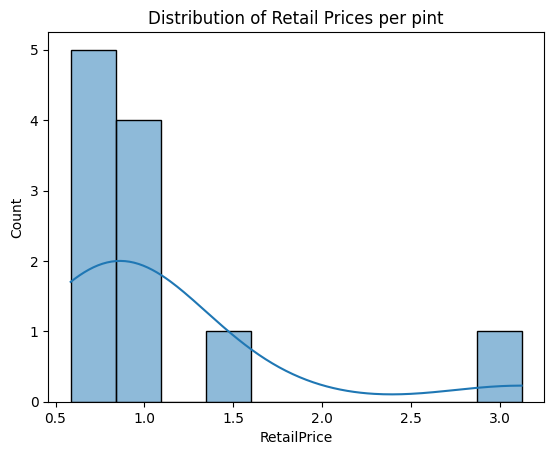

In [15]:
# Histogram for RetailPrice
df_per_pint=df[df["RetailPriceUnit"]=="per pint"]
plt.subplot(1, 1, 1)
sns.histplot(df_per_pint['RetailPrice'], kde=True)
plt.title('Distribution of Retail Prices per pint')

plt.show()


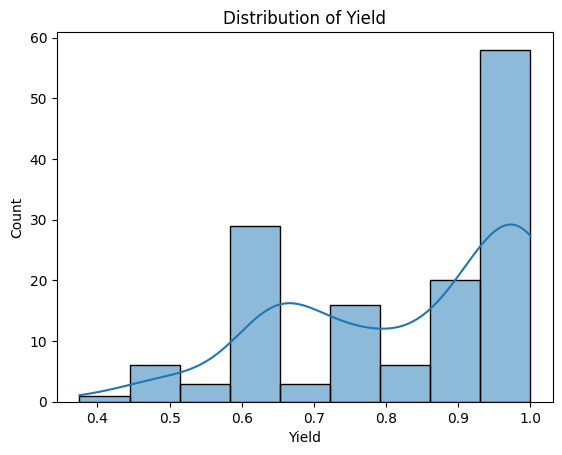

In [16]:
# Histogram for Yield
plt.subplot(1, 1, 1)
sns.histplot(df['Yield'], kde=True)
plt.title('Distribution of Yield')
plt.show()

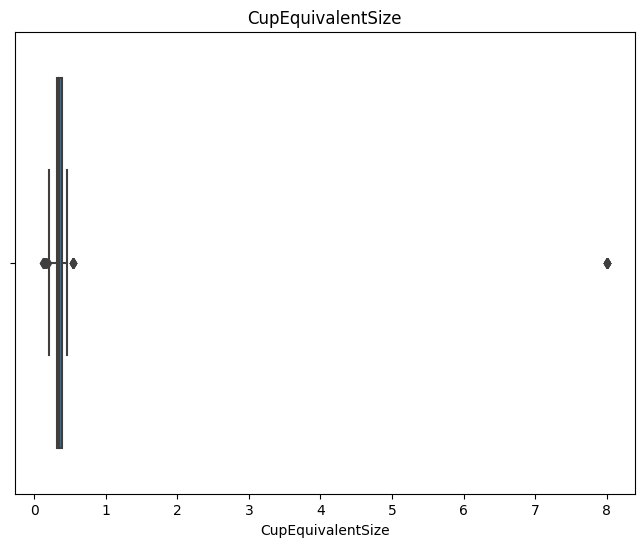

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='CupEquivalentSize',data=df)
plt.title('CupEquivalentSize')
plt.show()

In [18]:
df[df['CupEquivalentSize'] > 3]

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.0,8.0,fluid ounces,0.2926
4,"Apples, ready-to-drink",Juice,0.7804,per pint,1.0,8.0,fluid ounces,0.3902
63,"Grapefruit, ready-to-drink",Juice,1.0415,per pint,1.0,8.0,fluid ounces,0.5208
66,"Grapes, frozen concentrate",Juice,0.7119,per pint,1.0,8.0,fluid ounces,0.3559
67,"Grapes, ready-to-drink",Juice,0.9215,per pint,1.0,8.0,fluid ounces,0.4607
107,"Oranges, frozen concentrate",Juice,0.7690,per pint,1.0,8.0,fluid ounces,0.3845
108,"Oranges, ready-to-drink",Juice,0.9842,per pint,1.0,8.0,fluid ounces,0.4921
120,"Pineapple, frozen concentrate",Juice,0.6973,per pint,1.0,8.0,fluid ounces,0.3486
123,"Pineapple, ready-to-drink",Juice,1.0288,per pint,1.0,8.0,fluid ounces,0.5144
127,"Plum (prune), ready-to-drink",Juice,1.5522,per pint,1.0,8.0,fluid ounces,0.7761


In [19]:
df[df['RetailPriceUnit'].isin(["per pint"])]

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.0,8.0,fluid ounces,0.2926
4,"Apples, ready-to-drink",Juice,0.7804,per pint,1.0,8.0,fluid ounces,0.3902
63,"Grapefruit, ready-to-drink",Juice,1.0415,per pint,1.0,8.0,fluid ounces,0.5208
66,"Grapes, frozen concentrate",Juice,0.7119,per pint,1.0,8.0,fluid ounces,0.3559
67,"Grapes, ready-to-drink",Juice,0.9215,per pint,1.0,8.0,fluid ounces,0.4607
107,"Oranges, frozen concentrate",Juice,0.7690,per pint,1.0,8.0,fluid ounces,0.3845
108,"Oranges, ready-to-drink",Juice,0.9842,per pint,1.0,8.0,fluid ounces,0.4921
120,"Pineapple, frozen concentrate",Juice,0.6973,per pint,1.0,8.0,fluid ounces,0.3486
123,"Pineapple, ready-to-drink",Juice,1.0288,per pint,1.0,8.0,fluid ounces,0.5144
127,"Plum (prune), ready-to-drink",Juice,1.5522,per pint,1.0,8.0,fluid ounces,0.7761


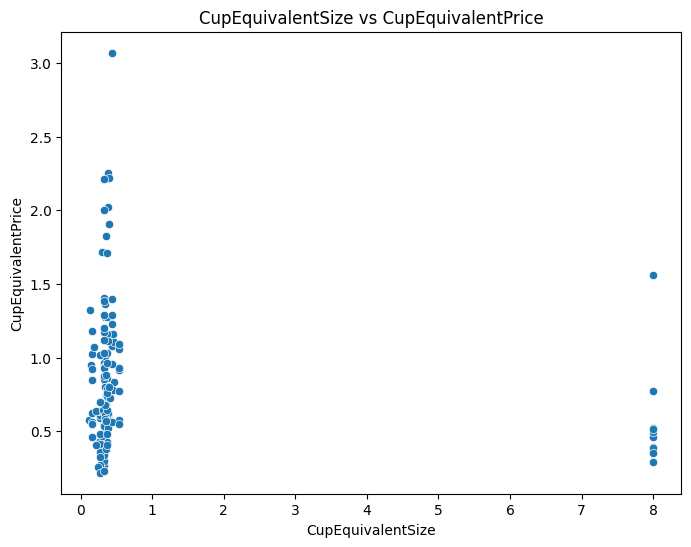

In [20]:
# Scatter Plot for RetailPrice vs Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CupEquivalentSize', y='CupEquivalentPrice', data=df)
plt.title('CupEquivalentSize vs CupEquivalentPrice')
plt.xlabel('CupEquivalentSize')
plt.ylabel('CupEquivalentPrice')
plt.show()


In [21]:
df['AdjustedCostPerCup'] = df['CupEquivalentPrice'] / (df['Yield'] * df['CupEquivalentSize'])


In [22]:
df["Item"].value_counts()

Item
Turnip greens                         3
Corn                                  3
Green beans                           3
Mustard greens                        2
Blackberries                          2
                                     ..
Clementines                           1
Cherries, packed in syrup or water    1
Cherries                              1
Celery, trimmed bunches               1
Zucchini                              1
Name: count, Length: 117, dtype: int64

In [23]:
df[df["Item"].isin(['Artichoke'])]

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,AdjustedCostPerCup
9,Artichoke,Fresh,2.1913,per pound,0.375,0.3858,pounds,2.2545,15.583204
10,Artichoke,Canned,3.4119,per pound,0.650,0.3858,pounds,2.0251,8.075527


In [24]:
df.sort_values(by='AdjustedCostPerCup',ascending = False).head(15)

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,AdjustedCostPerCup
9,Artichoke,Fresh,2.1913,per pound,0.3750,0.3858,pounds,2.2545,15.583204
11,Asparagus,Fresh,2.7576,per pound,0.4938,0.3968,pounds,2.2159,11.309083
47,"Cherries, packed in syrup or water",Canned,4.5257,per pound,0.6500,0.4409,pounds,3.0700,10.712354
90,Mangoes,Dried,10.5527,per pound,1.0000,0.1253,pounds,1.3219,10.549880
10,Artichoke,Canned,3.4119,per pound,0.6500,0.3858,pounds,2.0251,8.075527
59,Figs,Dried,6.8371,per pound,0.9600,0.1653,pounds,1.1776,7.420851
12,Asparagus,Canned,3.1269,per pound,0.6500,0.3968,pounds,1.9090,7.401520
136,Raspberries,Fresh,6.6391,per pound,0.9600,0.3197,pounds,2.2107,7.203042
129,Pomegranate,Fresh,2.2350,per pound,0.5600,0.3417,pounds,1.3638,7.127179
102,Okra,Fresh,3.9803,per pound,0.7695,0.3527,pounds,1.8246,6.722853


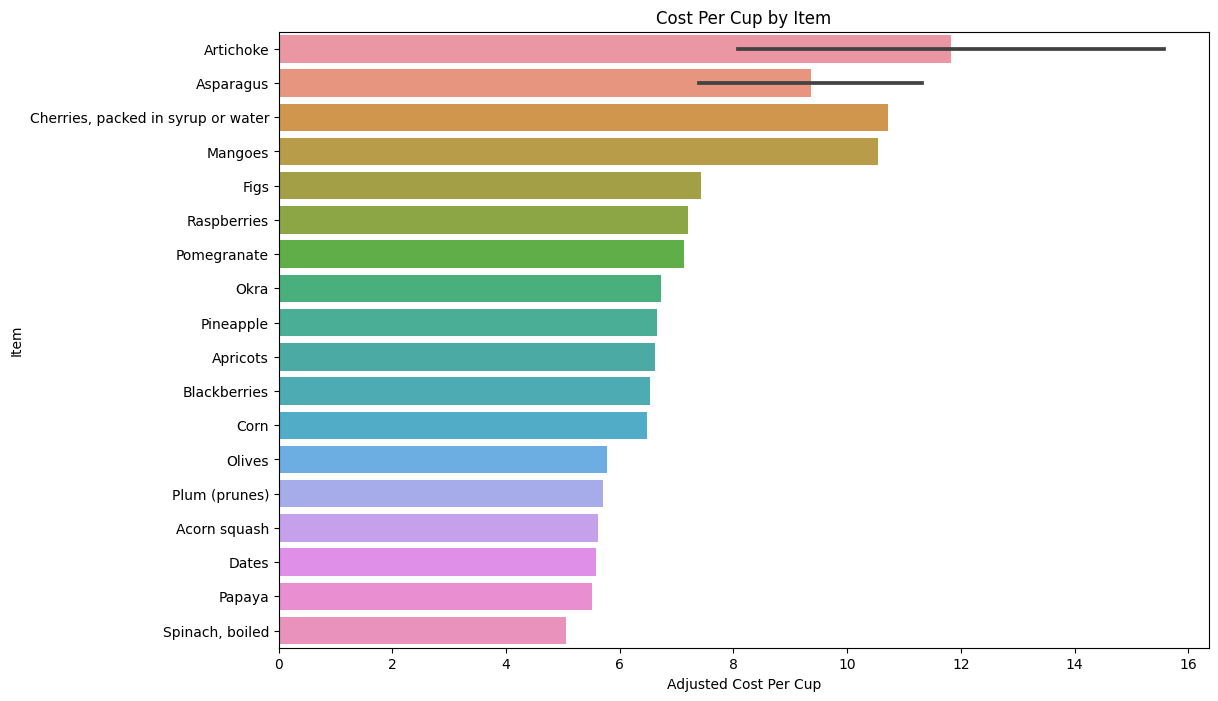

In [25]:
sorted_df = df.sort_values(by='AdjustedCostPerCup', ascending=False).head(20)

# Create the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='AdjustedCostPerCup', y='Item', data=sorted_df)

# Adding titles and labels
plt.title('Cost Per Cup by Item')
plt.xlabel('Adjusted Cost Per Cup')
plt.ylabel('Item')

# Show the plot
plt.show()